In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_data = pd.read_csv('/Users/soroushesnaashari/train.csv', encoding='unicode_escape')

columns_to_drop = ['px_width', 'px_height', 'sc_w', 'sc_h', 'm_dep']
train_data = train_data.drop(columns=columns_to_drop)

train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,2549,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,2631,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,2603,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,2769,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1411,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,668,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,187,4,3,2032,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,108,8,3,3057,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,145,5,5,869,19,1,1,1,0


In [3]:
train_data['n_cores'].min()

1

In [4]:
train_data['n_cores'].max()

8

In [5]:
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

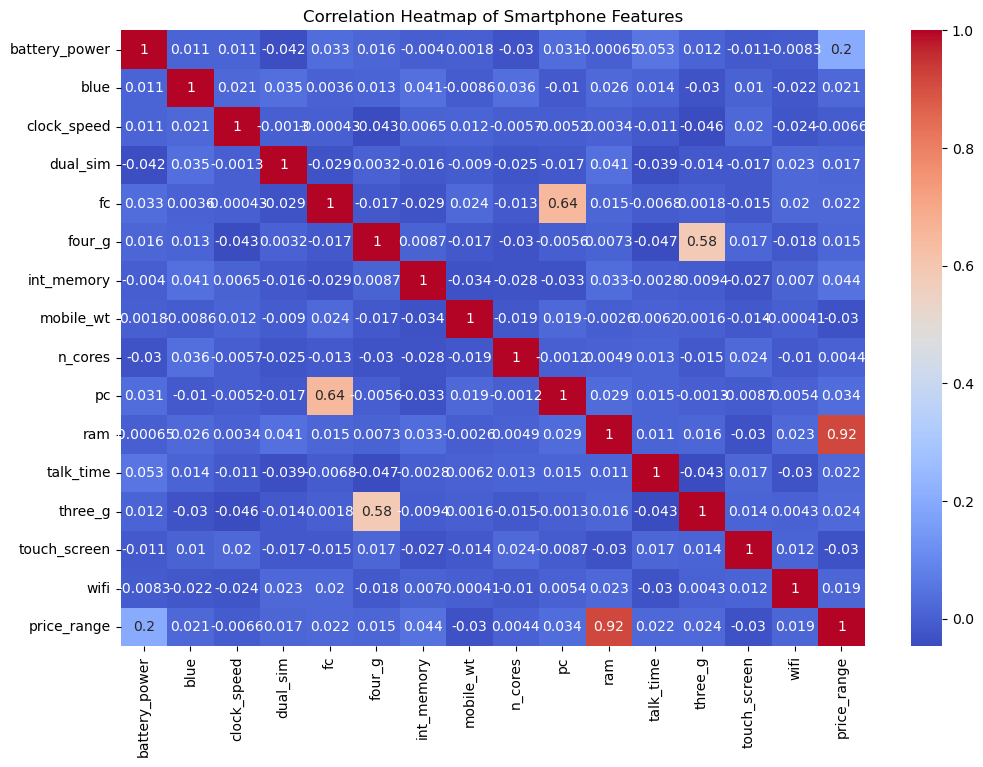

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Smartphone Features')
plt.show()

Unique values and their counts in 'price_range':
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


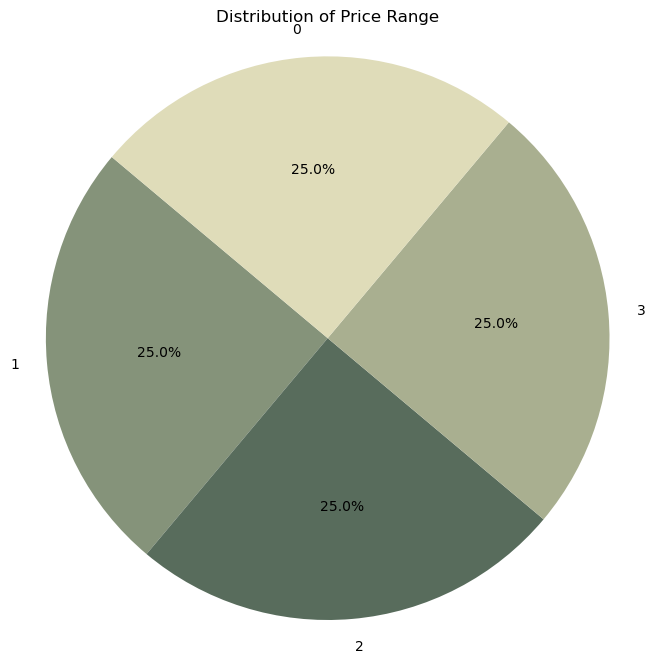

In [9]:
price_range_counts = train_data['price_range'].value_counts()

print("Unique values and their counts in 'price_range':")
print(price_range_counts)

plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=140, colors=['#85937a','#586c5c','#a9af90','#dfdcb9'])
plt.title('Distribution of Price Range')
plt.axis('equal')
plt.show()

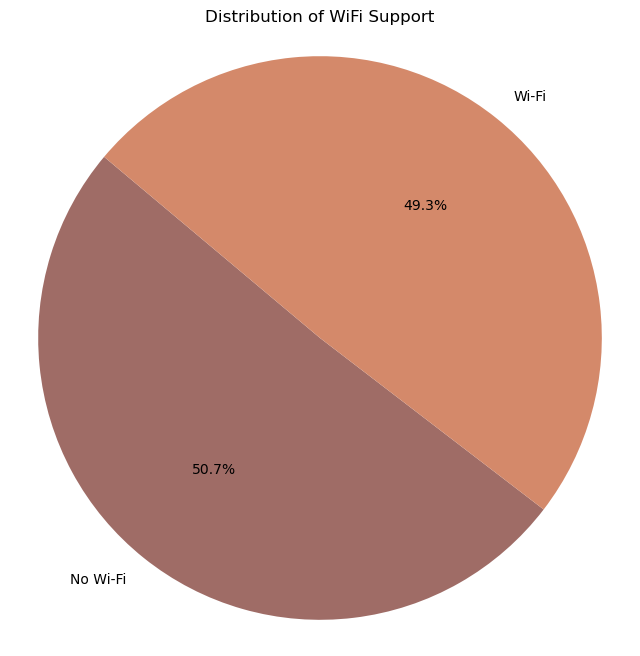

In [10]:
wifi_counts = train_data['wifi'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wifi_counts, labels=['No Wi-Fi', 'Wi-Fi'], autopct='%1.1f%%', startangle=140, colors=['#9f6c66','#d4896a'])
plt.title('Distribution of WiFi Support')
plt.axis('equal')
plt.show()

In [11]:
train_data['battery_power'].min()

501

In [12]:
train_data['battery_power'].max()

1998

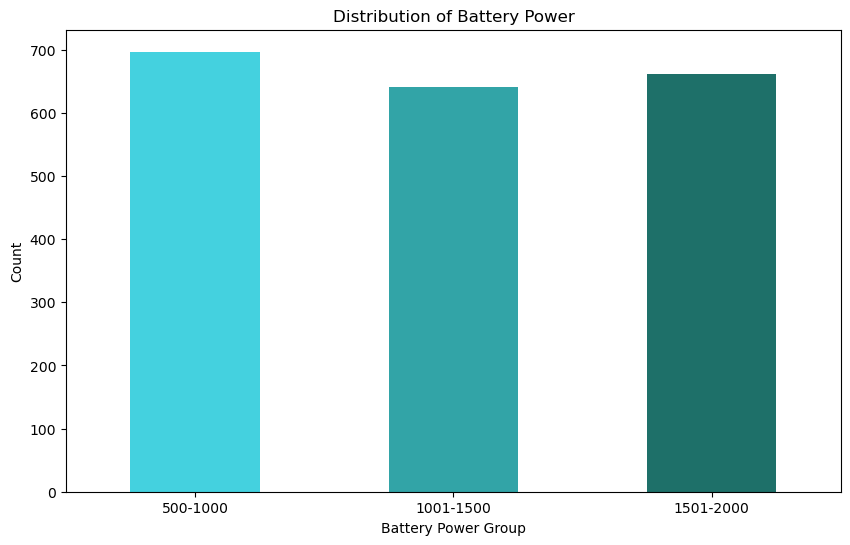

In [13]:
bins = [500, 1000, 1500, 2000]
labels = ['500-1000', '1001-1500', '1501-2000']
train_data['battery_group'] = pd.cut(train_data['battery_power'], bins=bins, labels=labels, include_lowest=True)

battery_group_counts = train_data['battery_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
battery_group_counts.plot(kind='bar', color=['#44d1df', '#32a4a7', '#1e7069'])
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

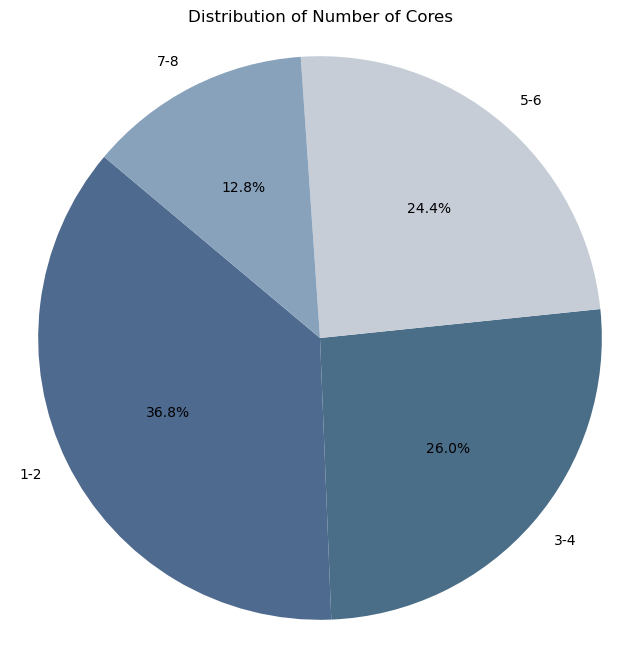

In [14]:
core_bins = [1, 3, 5, 7, 9]
core_labels = ['1-2', '3-4', '5-6', '7-8']
train_data['core_group'] = pd.cut(train_data['n_cores'], bins=core_bins, labels=core_labels, include_lowest=True)

core_group_counts = train_data['core_group'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(core_group_counts, labels=core_group_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4f6a8f', '#4a6d88', '#c6cdd7', '#88a2bc'])
plt.title('Distribution of Number of Cores')
plt.axis('equal')
plt.show()

### Decision Tree Basic Model

In [15]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)
dt_basic_pred = dt_clf.predict(X_test_scaled)
dt_basic_accuracy = accuracy_score(y_test, dt_basic_pred)
print("Decision Tree Basic Model:")
print(f"Accuracy: {dt_basic_accuracy}")

Decision Tree Basic Model:
Accuracy: 0.7325


### Random Forest Basic Model

In [16]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_basic_pred = rf_clf.predict(X_test_scaled)
rf_basic_accuracy = accuracy_score(y_test, rf_basic_pred)
print("\nRandom Forest Basic Model:")
print(f"Accuracy: {rf_basic_accuracy}")


Random Forest Basic Model:
Accuracy: 0.795


### SVM Basic Model

In [17]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_basic_pred = svm_clf.predict(X_test_scaled)
svm_basic_accuracy = accuracy_score(y_test, svm_basic_pred)
print("\nSVM Basic Model:")
print(f"Accuracy: {svm_basic_accuracy}")


SVM Basic Model:
Accuracy: 0.7875


# How to enhance the accuracy?
We have two options, using Grid Search or Random Search, first I will try Grid Search and then Random Search

## Grid Search

### Decision Tree

In [18]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(dt_clf, param_grid_dt, cv=5, n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)
dt_grid_pred = dt_grid.best_estimator_.predict(X_test_scaled)
dt_grid_accuracy = accuracy_score(y_test, dt_grid_pred)
print("Decision Tree Grid Search:")
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Accuracy: {dt_grid_accuracy}")

Decision Tree Grid Search:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.75


### Random Forest

In [19]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(rf_clf, param_grid_rf, cv=5, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
rf_grid_pred = rf_grid.best_estimator_.predict(X_test_scaled)
rf_grid_accuracy = accuracy_score(y_test, rf_grid_pred)
print("\nRandom Forest Grid Search:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Accuracy: {rf_grid_accuracy}")


Random Forest Grid Search:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8


### SVM

In [20]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svm_grid = GridSearchCV(svm_clf, param_grid_svm, cv=5, n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)
svm_grid_pred = svm_grid.best_estimator_.predict(X_test_scaled)
svm_grid_accuracy = accuracy_score(y_test, svm_grid_pred)
print("\nSVM Grid Search:")
print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Accuracy: {svm_grid_accuracy}")


SVM Grid Search:
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.81


## Random Search

### Decision Tree

In [21]:
param_dist_dt = {
    'max_depth': [3, None],
    'max_features': randint(1, 9),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'criterion': ['gini', 'entropy']
}
dt_random_search = RandomizedSearchCV(dt_clf, param_distributions=param_dist_dt, n_iter=100, cv=5, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train_scaled, y_train)
dt_random_pred = dt_random_search.best_estimator_.predict(X_test_scaled)
dt_random_accuracy = accuracy_score(y_test, dt_random_pred)
print("Decision Tree Random Search:")
print(f"Best Parameters: {dt_random_search.best_params_}")
print(f"Accuracy: {dt_random_accuracy}")

Decision Tree Random Search:
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 8}
Accuracy: 0.7025


### Random Forest

In [22]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf, n_iter=100, cv=5, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train_scaled, y_train)
rf_random_pred = rf_random_search.best_estimator_.predict(X_test_scaled)
rf_random_accuracy = accuracy_score(y_test, rf_random_pred)
print("\nRandom Forest Random Search:")
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Accuracy: {rf_random_accuracy}")

/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
 


Random Forest Random Search:
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Accuracy: 0.8


### SVM

In [23]:
param_dist_svm = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svm_random_search = RandomizedSearchCV(svm_clf, param_distributions=param_dist_svm, n_iter=100, cv=5, random_state=42, n_jobs=-1)
svm_random_search.fit(X_train_scaled, y_train)
svm_random_pred = svm_random_search.best_estimator_.predict(X_test_scaled)
svm_random_accuracy = accuracy_score(y_test, svm_random_pred)
print("\nSVM Random Search:")
print(f"Best Parameters: {svm_random_search.best_params_}")
print(f"Accuracy: {svm_random_accuracy}")


SVM Random Search:
Best Parameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}
Accuracy: 0.81


### Explanation:
Here I want to find the best answer between the different result that I get from each optimization

#### Decision Tree's best answer:

In [24]:
if dt_basic_accuracy > dt_grid_accuracy and dt_basic_accuracy > dt_random_accuracy:
    best_dt_model = dt_clf
    best_dt_accuracy = dt_basic_accuracy
    search_type_dt = "Basic Model"
elif dt_grid_accuracy > dt_random_accuracy:
    best_dt_model = dt_grid.best_estimator_
    best_dt_accuracy = dt_grid_accuracy
    search_type_dt = "Grid Search"
else:
    best_dt_model = dt_random_search.best_estimator_
    best_dt_accuracy = dt_random_accuracy
    search_type_dt = "Random Search"
    
print(f"\nBest Decision Tree Model was found using {search_type_dt}")
print(f"Decision Tree Accuracy: {best_dt_accuracy}")
print(f"Decision Tree Parameters: {best_dt_model.get_params()}")


Best Decision Tree Model was found using Grid Search
Decision Tree Accuracy: 0.75
Decision Tree Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### Random Forest's best answer:

In [25]:
if rf_basic_accuracy > rf_grid_accuracy and rf_basic_accuracy > rf_random_accuracy:
    best_rf_model = rf_clf
    best_rf_accuracy = rf_basic_accuracy
    search_type_rf = "Basic Model"
elif rf_grid_accuracy > rf_random_accuracy:
    best_rf_model = rf_grid.best_estimator_
    best_rf_accuracy = rf_grid_accuracy
    search_type_rf = "Grid Search"
else:
    best_rf_model = rf_random_search.best_estimator_
    best_rf_accuracy = rf_random_accuracy
    search_type_rf = "Random Search"
    
print(f"\nBest Random Forest Model was found using {search_type_rf}")
print(f"Random Forest Accuracy: {best_rf_accuracy}")
print(f"Random Forest Parameters: {best_rf_model.get_params()}")


Best Random Forest Model was found using Random Search
Random Forest Accuracy: 0.8
Random Forest Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### SVM's best answer:

In [26]:
if svm_basic_accuracy > svm_grid_accuracy and svm_basic_accuracy > svm_random_accuracy:
    best_svm_model = svm_clf
    best_svm_accuracy = svm_basic_accuracy
    search_type_svm = "Basic Model"
elif svm_grid_accuracy > svm_random_accuracy:
    best_svm_model = svm_grid.best_estimator_
    best_svm_accuracy = svm_grid_accuracy
    search_type_svm = "Grid Search"
else:
    best_svm_model = svm_random_search.best_estimator_
    best_svm_accuracy = svm_random_accuracy
    search_type_svm = "Random Search"

print(f"\nBest SVM Model was found using {search_type_svm}")
print(f"SVM Accuracy: {best_svm_accuracy}")
print(f"SVM Parameters: {best_svm_model.get_params()}")


Best SVM Model was found using Random Search
SVM Accuracy: 0.81
SVM Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Now that we have each algorithm's best answer, it's time to predict the train file's price range

In [27]:
test_data = pd.read_csv('/Users/soroushesnaashari/test.csv', encoding='unicode_escape')
columns_to_drop2 = ['id', 'px_width', 'px_height', 'sc_w', 'sc_h', 'm_dep']
test_data = test_data.drop(columns=columns_to_drop2)
X_test_scaled = scaler.transform(test_data)

In [28]:
dt_predictions = best_dt_model.predict(X_test_scaled)

In [29]:
rf_predictions = best_rf_model.predict(X_test_scaled)

In [30]:
svm_predictions = best_svm_model.predict(X_test_scaled)

### Here I put the results into a data frame

In [31]:
predictions_df = pd.DataFrame({
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
    'SVM': svm_predictions
})

print(predictions_df)

     Decision Tree  Random Forest  SVM
0                3              2    2
1                3              3    3
2                2              2    2
3                3              3    3
4                1              1    1
..             ...            ...  ...
995              2              2    2
996              1              1    1
997              1              1    1
998              2              2    2
999              2              2    2

[1000 rows x 3 columns]


### At last I want to have the number which repeated more as a single answer

In [32]:
row_predictions = predictions_df.mode(axis=1)

result = row_predictions.iloc[:, 0]

print("Final Predictions:")
print(result)

Final Predictions:
0      2
1      3
2      2
3      3
4      1
      ..
995    2
996    1
997    1
998    2
999    2
Name: 0, Length: 1000, dtype: int64
